In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# ==========================================
# 1. Upload CSV File (Google Colab)
# ==========================================
from google.colab import files
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load into pandas
import pandas as pd
df = pd.read_csv(file_name)

# Preview the dataset
print("Dataset Preview:")
print(df.head())

Saving total data.csv to total data.csv
Dataset Preview:
          trip a         trip b    km        date     time  stops   speed  \
0           home  sophie's work   6.0  12/16/2025  6:40 AM       3     40   
1  sophie's work           home   6.0  12/16/2025  7:15 AM       1     50   
2           home        QC hall  13.0  12/16/2025  1:51 PM       2     70   
3        QC hall           QMMC   8.0  12/16/2025  2:10 PM       5     40   
4           QMMC         School  11.0  12/16/2025  2:40 PM       7     30   

   duration  hurry  stress  
0        25      1       8  
1        15      0       4  
2        40      1       8  
3        38      1       9  
4       110      1      10  


In [3]:
# ==========================================
# 3. CLEANING – Remove Outliers
# ==========================================
# Remove unrealistic distance (example rule)
df = df[(df["km"] >= 1) & (df["km"] <= 100)]

# Remove unrealistic speed
df = df[(df["speed"] >= 5) & (df["speed"] <= 150)]

# Remove unrealistic duration
df = df[(df["duration"] >= 1) & (df["duration"] <= 300)]


In [4]:
# ==========================================
# 4. REGULAR EXPRESSIONS – Standardize Text
# ==========================================
def standardize_text(text):
    if pd.isnull(text):
        return text
    text = str(text).lower().strip()
    text = re.sub(r"\s+", " ", text)
    return text

df["trip a"] = df["trip a"].apply(standardize_text)
df["trip b"] = df["trip b"].apply(standardize_text)


In [5]:
# ==========================================
# 6. HANDLE MISSING VALUES
# ==========================================
print("\nMissing Values Before:")
print(df.isnull().sum())

# Interpolate numeric columns
df.interpolate(inplace=True)

# Drop remaining missing values
df.dropna(inplace=True)

print("\nMissing Values After:")
print(df.isnull().sum())


Missing Values Before:
trip a      0
trip b      0
km          0
date        0
time        0
stops       0
speed       0
duration    0
hurry       0
stress      0
dtype: int64

Missing Values After:
trip a      0
trip b      0
km          0
date        0
time        0
stops       0
speed       0
duration    0
hurry       0
stress      0
dtype: int64


/tmp/ipython-input-1207495792.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)


In [6]:
# If your route is separated into "trip a" and "trip b"
# We combine them into one route column

df["route"] = df["trip a"].astype(str) + " → " + df["trip b"].astype(str)

# 1️⃣ Count distinct routes
distinct_routes = df["route"].nunique()

print("\nTotal Number of Distinct Routes:", distinct_routes)

# 2️⃣ Get Top 5 Most Frequent Routes
top5_routes = df["route"].value_counts().head(5).reset_index()
top5_routes.columns = ["Route", "Frequency"]

print("\nTop 5 Most Frequent Routes:")
top5_routes



Total Number of Distinct Routes: 69

Top 5 Most Frequent Routes:


,Route,Frequency
0,sophie's work → home,53
1,home → sophie's work,52
2,school → home,11
3,home → school,10
4,home → sm novaliches,8


In [7]:
# ==========================================
# 8. EXPLORATORY DATA ANALYSIS
# ==========================================

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

print("\nMean:")
print(df.mean(numeric_only=True))

print("\nMedian:")
print(df.median(numeric_only=True))

print("\nMode:")
print(df.mode(numeric_only=True).iloc[0])


Descriptive Statistics:
               km      stops        speed    duration       hurry      stress
count  224.000000  224.000000  224.000000  224.000000  224.000000  224.000000
mean     7.071875    1.504464   49.598214   22.946429    0.267857    4.647321
std      5.465552    1.388608   14.048896   14.108064    0.443835    2.459664
min      1.000000    0.000000   30.000000    5.000000    0.000000    0.000000
25%      3.500000    1.000000   40.000000   15.000000    0.000000    3.000000
50%      6.000000    1.000000   50.000000   20.000000    0.000000    4.000000
75%      6.000000    3.000000   50.000000   25.000000    1.000000    6.250000
max     21.000000    7.000000  120.000000  110.000000    1.000000   10.000000

Mean:
km           7.071875
stops        1.504464
speed       49.598214
duration    22.946429
hurry        0.267857
stress       4.647321
dtype: float64

Median:
km           6.0
stops        1.0
speed       50.0
duration    20.0
hurry        0.0
stress       4.0
dtype: f

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns

summary_data = []

for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    std_val = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()

    # Determine distribution shape
    if mean_val > median_val:
        shape = "Right-Skewed"
    elif mean_val < median_val:
        shape = "Left-Skewed"
    else:
        shape = "Symmetrical"

    summary_data.append([
        col.capitalize(),
        round(mean_val, 2),
        round(median_val, 2),
        round(mode_val, 2),
        round(std_val, 2),
        round(min_val, 2),
        round(max_val, 2),
        shape
    ])

summary_table = pd.DataFrame(summary_data, columns=[
    "Variable",
    "Mean",
    "Median",
    "Mode",
    "Std Dev",
    "Minimum",
    "Maximum",
    "Distribution Shape"
])

summary_table


,Variable,Mean,Median,Mode,Std Dev,Minimum,Maximum,Distribution Shape
0,Km,7.07,6.0,6.0,5.47,1.0,21.0,Right-Skewed
1,Stops,1.50,1.0,1.0,1.39,0.0,7.0,Right-Skewed
2,Speed,49.60,50.0,40.0,14.05,30.0,120.0,Left-Skewed
3,Duration,22.95,20.0,15.0,14.11,5.0,110.0,Right-Skewed
4,Hurry,0.27,0.0,0.0,0.44,0.0,1.0,Right-Skewed
5,Stress,4.65,4.0,4.0,2.46,0.0,10.0,Right-Skewed


In [15]:
df.columns = df.columns.str.strip()
print(df.columns)  # check that 'stops' has no extra spaces


Index(['trip a', 'trip b', 'km', 'date', 'time', 'stops', 'speed', 'duration',
       'hurry', 'stress', 'route'],
      dtype='object')


Stress/Fatigue Levels → Skewness: 0.33 (Approximately Symmetrical)


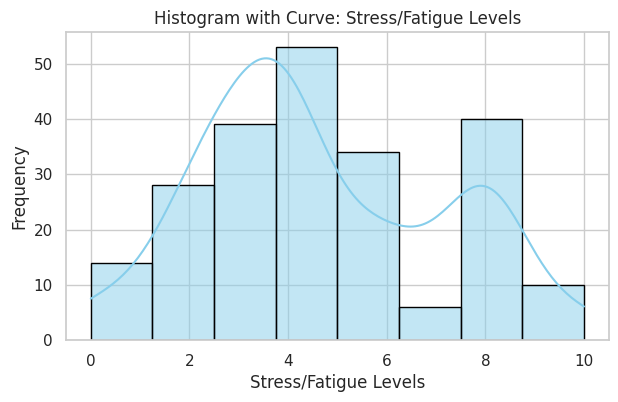

Trip Duration → Skewness: 2.18 (Right-Skewed)


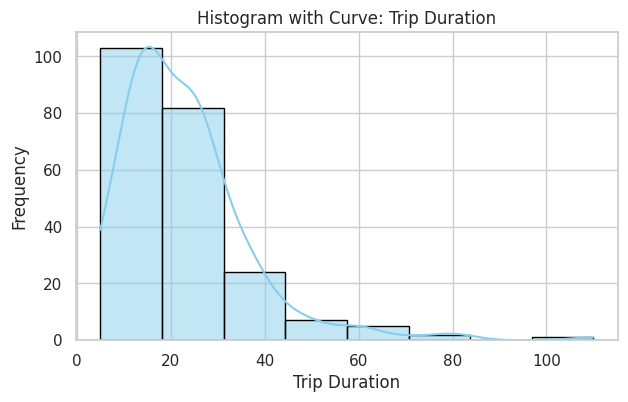

Number of Stops → Skewness: 1.17 (Right-Skewed)


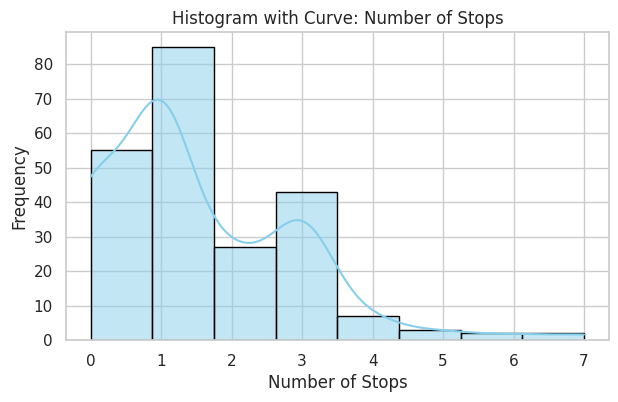

In [16]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

variables = [
    ("stress", "Stress/Fatigue Levels"),
    ("duration", "Trip Duration"),
    ("stops", "Number of Stops")
]

for col, label in variables:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=8, kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Histogram with Curve: {label}")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    skew_val = skew(df[col].dropna())
    if skew_val > 0.5:
        skew_desc = "Right-Skewed"
    elif skew_val < -0.5:
        skew_desc = "Left-Skewed"
    else:
        skew_desc = "Approximately Symmetrical"

    print(f"{label} → Skewness: {skew_val:.2f} ({skew_desc})")

    plt.show()


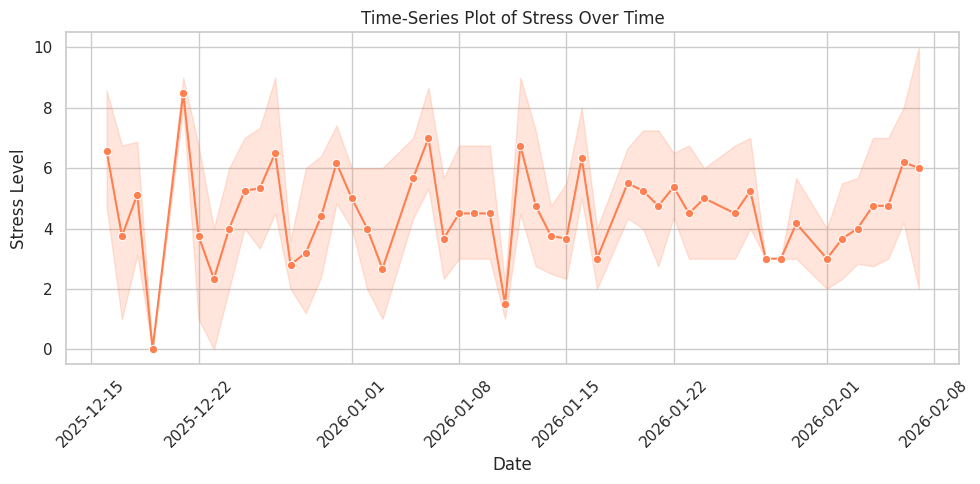

In [17]:
# Make sure column names are clean
df.columns = df.columns.str.strip()

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sort by date
df = df.sort_values('date')

# Plot stress over time
plt.figure(figsize=(10,5))
sns.lineplot(x='date', y='stress', data=df, marker='o', color='coral')
plt.title("Time-Series Plot of Stress Over Time")
plt.xlabel("Date")
plt.ylabel("Stress Level")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Correlation Matrix:


,stress,duration,km,stops,speed
stress,1.00,0.47,0.25,0.53,0.08
duration,0.47,1.00,0.68,0.49,0.29
km,0.25,0.68,1.00,0.24,0.74
stops,0.53,0.49,0.24,1.00,-0.04
speed,0.08,0.29,0.74,-0.04,1.00


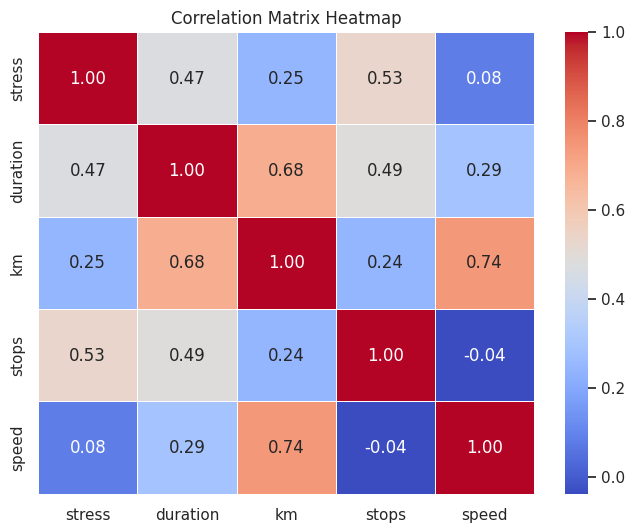

In [18]:
# Clean column names
df.columns = df.columns.str.strip()

# Select key variables
key_vars = ["stress", "duration", "km", "stops", "speed"]

# Compute correlation matrix
corr_matrix = df[key_vars].corr()

# Display correlation matrix as a table
print("📊 Correlation Matrix:")
display(corr_matrix.round(2))

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

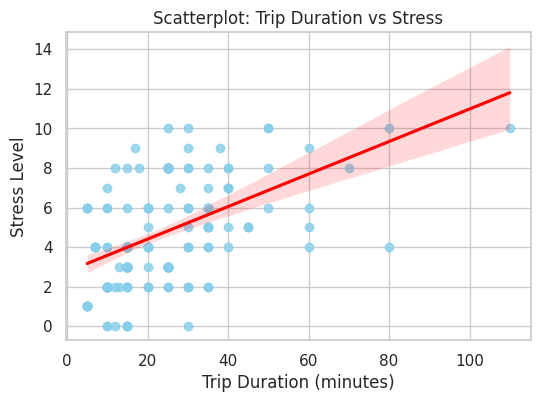

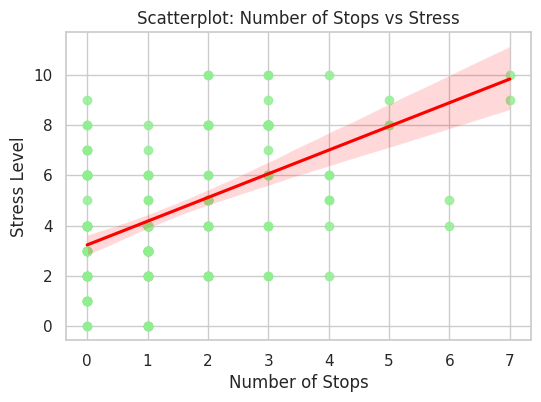

In [19]:
# Set style
sns.set(style="whitegrid")

# 1️⃣ Scatterplot: Trip Duration vs Stress
plt.figure(figsize=(6,4))
sns.regplot(x="duration", y="stress", data=df, scatter_kws={"color":"skyblue"}, line_kws={"color":"red"})
plt.title("Scatterplot: Trip Duration vs Stress")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Stress Level")
plt.show()

# 2️⃣ Scatterplot: Number of Stops vs Stress
plt.figure(figsize=(6,4))
sns.regplot(x="stops", y="stress", data=df, scatter_kws={"color":"lightgreen"}, line_kws={"color":"red"})
plt.title("Scatterplot: Number of Stops vs Stress")
plt.xlabel("Number of Stops")
plt.ylabel("Stress Level")
plt.show()

/tmp/ipython-input-346747130.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='hurry', y='stress', data=df, ci='sd', palette=['orange','skyblue'])
/tmp/ipython-input-346747130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hurry', y='stress', data=df, ci='sd', palette=['orange','skyblue'])


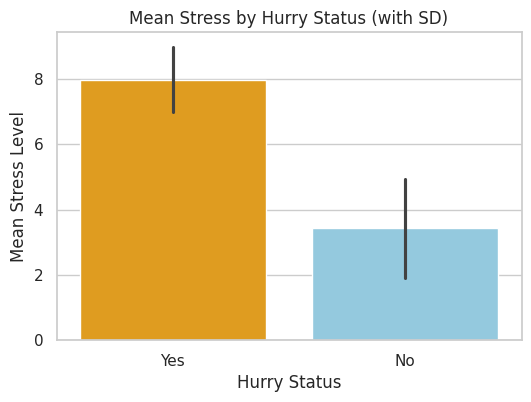

/tmp/ipython-input-346747130.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hurry', y='stress', data=df, palette=['orange','skyblue'])


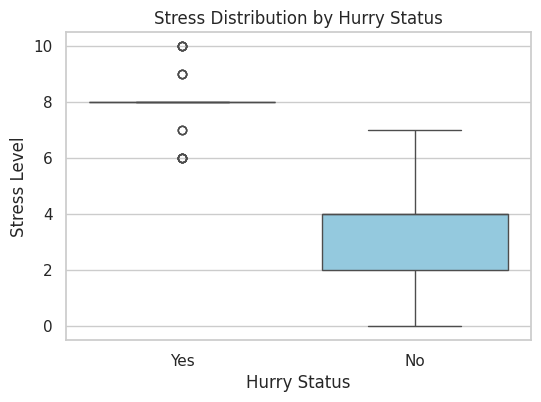

In [20]:
# Clean column names
df.columns = df.columns.str.strip()

# Make sure 'hurry' is consistent string: Yes / No
df['hurry'] = df['hurry'].astype(str).str.strip().replace({'1':'Yes', '0':'No', 'nan':'Unknown'})

# Bar Chart: Mean stress ± SD
plt.figure(figsize=(6,4))
sns.barplot(x='hurry', y='stress', data=df, ci='sd', palette=['orange','skyblue'])
plt.title("Mean Stress by Hurry Status (with SD)")
plt.xlabel("Hurry Status")
plt.ylabel("Mean Stress Level")
plt.show()

# Boxplot: Stress distribution by Hurry Status
plt.figure(figsize=(6,4))
sns.boxplot(x='hurry', y='stress', data=df, palette=['orange','skyblue'])
plt.title("Stress Distribution by Hurry Status")
plt.xlabel("Hurry Status")
plt.ylabel("Stress Level")
plt.show()

In [22]:
from scipy.stats import ttest_ind
# Clean column names
df.columns = df.columns.str.strip()

# Ensure hurry is Yes/No
df['hurry'] = df['hurry'].astype(str).str.strip().replace({'1':'Yes', '0':'No', 'nan':'Unknown'})

# Separate the groups
stress_yes = df[df['hurry'] == 'Yes']['stress'].dropna()
stress_no = df[df['hurry'] == 'No']['stress'].dropna()

# Independent t-test (Welch's t-test)
t_stat, p_value = ttest_ind(stress_yes, stress_no, equal_var=False)

# Cohen's d (effect size)
mean_diff = stress_yes.mean() - stress_no.mean()
pooled_sd = np.sqrt((stress_yes.std()**2 + stress_no.std()**2) / 2)
cohen_d = mean_diff / pooled_sd

# Create results table
t_test_table = pd.DataFrame({
    "Group": ["Hurry = Yes", "Hurry = No", "t-test results"],
    "Mean Stress": [round(stress_yes.mean(),2), round(stress_no.mean(),2), ""],
    "t-value": ["", "", round(t_stat,3)],
    "p-value": ["", "", round(p_value,5)],
    "Cohen's d": ["", "", round(cohen_d,3)]
})

t_test_table

,Group,Mean Stress,t-value,p-value,Cohen's d
0,Hurry = Yes,7.98,,,
1,Hurry = No,3.43,,,
2,t-test results,,25.96,0.0,3.537


In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Clean column names
df.columns = df.columns.str.strip()

# Make sure duration and stops are numeric
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['stops'] = pd.to_numeric(df['stops'], errors='coerce')

# Optional: categorize stops for clearer ANOVA interpretation
df['stops_cat'] = pd.cut(df['stops'], bins=[-1,1,3,10], labels=['Low','Medium','High'])

# Drop any rows with missing values in relevant columns
anova_data = df.dropna(subset=['stress','duration','stops_cat'])

# Fit the two-way ANOVA model with interaction
model = ols('stress ~ duration * stops_cat', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate Partial Eta Squared for effect size
anova_table['Partial_Eta_Sq'] = anova_table['sum_sq'] / (anova_table['sum_sq'] + anova_table['df'].sum())

# Round values for clarity
anova_table = anova_table.round(3)

# Optional: rename columns for readability
anova_table = anova_table.rename(columns={
    'sum_sq': 'Sum of Squares',
    'df': 'DF',
    'F': 'F-value',
    'PR(>F)': 'p-value'
})

# Display ANOVA table
print("📊 Two-Way ANOVA Results (Stress ~ Duration × Stops Category):\n")
display(anova_table)

📊 Two-Way ANOVA Results (Stress ~ Duration × Stops Category):



,Sum of Squares,DF,F-value,p-value,Partial_Eta_Sq
stops_cat,249.308,2.0,34.339,0.000,0.528
duration,105.866,1.0,29.163,0.000,0.322
duration:stops_cat,8.182,2.0,1.127,0.326,0.035
Residual,791.366,218.0,NaN,NaN,0.780


/tmp/ipython-input-1948424744.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-1948424744.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


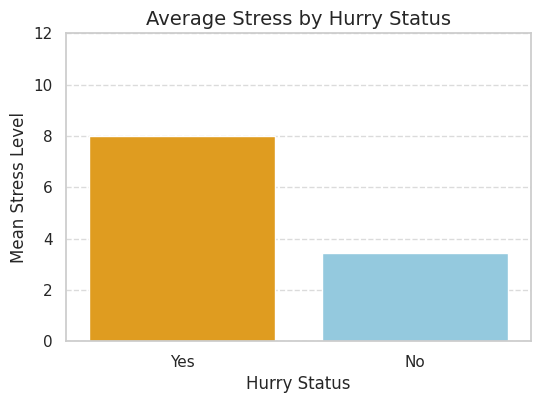

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names and hurry
df.columns = df.columns.str.strip()
df['hurry'] = df['hurry'].astype(str).str.strip().replace({'1':'Yes', '0':'No', 'nan':'Unknown'})

# Bar chart: Average Stress by Hurry Status
plt.figure(figsize=(6,4))
sns.barplot(
    x='hurry',
    y='stress',
    data=df,
    ci=None,  # No SD error bars
    palette=['orange', 'skyblue']
)

plt.title("Average Stress by Hurry Status", fontsize=14)
plt.xlabel("Hurry Status", fontsize=12)
plt.ylabel("Mean Stress Level", fontsize=12)
plt.ylim(0, df['stress'].max() + 2)  # Add extra space on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


/tmp/ipython-input-3507334561.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_means = interaction_data.groupby(['duration_cat','stops_cat'])['stress'].mean().reset_index()


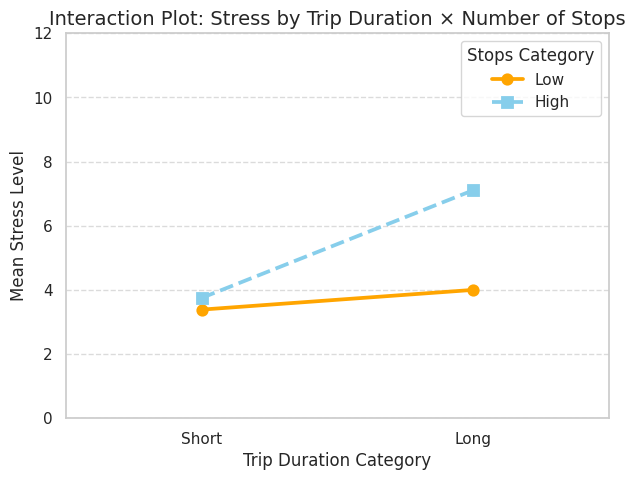

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Clean column names
df.columns = df.columns.str.strip()

# Create trip duration categories (Short / Long)
df['duration_cat'] = pd.cut(df['duration'], bins=[0, df['duration'].median(), df['duration'].max()],
                            labels=['Short', 'Long'])

# Create stops categories (Low / High)
df['stops_cat'] = pd.cut(df['stops'], bins=[-1, df['stops'].median(), df['stops'].max()],
                         labels=['Low', 'High'])

# Drop missing values
interaction_data = df.dropna(subset=['stress', 'duration_cat', 'stops_cat'])

# Calculate mean stress for each combination
interaction_means = interaction_data.groupby(['duration_cat','stops_cat'])['stress'].mean().reset_index()

# Plot interaction
plt.figure(figsize=(7,5))
sns.pointplot(
    data=interaction_means,
    x='duration_cat',
    y='stress',
    hue='stops_cat',
    palette=['orange','skyblue'],
    markers=['o','s'],
    linestyles=['-','--']
)

plt.title("Interaction Plot: Stress by Trip Duration × Number of Stops", fontsize=14)
plt.xlabel("Trip Duration Category", fontsize=12)
plt.ylabel("Mean Stress Level", fontsize=12)
plt.ylim(0, df['stress'].max() + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Stops Category')

plt.show()
